Long short-term memory is an artificial neural network used in the fields of artificial intelligence and deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. Such a recurrent neural network can process not only single data points, but also entire sequences of data.

LSTMs are predominately used to learn, process, and classify sequential data because these networks can learn long-term dependencies between time steps of data. Some other common LSTM applications include sentiment analysis, language modeling, speech recognition, and video analysis.

Here, we will build a simple LSTM model that can be used to predict stock prices. Specifically, we will be using Facebook to exemplify the models accuracy.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
plt.rcParams["figure.figsize"] = (22,8.5)

In [11]:
#load data
company = 'FB'
start = dt.datetime(2012, 1,1)
end = dt.datetime.now()
data = web.DataReader(company, 'yahoo', start, end)

In [12]:
#prepare data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
prediction_days=60
x_train  = []
y_train = []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [13]:
#build model
model=Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #predicting the next closing value

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
7/7 [==============================] - 3s 37ms/step - loss: 0.0497
Epoch 2/25
7/7 [==============================] - 0s 33ms/step - loss: 0.0120
Epoch 3/25
7/7 [==============================] - 0s 35ms/step - loss: 0.0106
Epoch 4/25
7/7 [==============================] - 0s 33ms/step - loss: 0.0107
Epoch 5/25
7/7 [==============================] - 0s 34ms/step - loss: 0.0085
Epoch 6/25
7/7 [==============================] - 0s 35ms/step - loss: 0.0065
Epoch 7/25
7/7 [==============================] - 0s 34ms/step - loss: 0.0070
Epoch 8/25
7/7 [==============================] - 0s 36ms/step - loss: 0.0074
Epoch 9/25
7/7 [==============================] - 0s 33ms/step - loss: 0.0085
Epoch 10/25
7/7 [==============================] - 0s 34ms/step - loss: 0.0074
Epoch 11/25
7/7 [==============================] - 0s 35ms/step - loss: 0.0071
Epoch 12/25
7/7 [==============================] - 0s 33ms/step - loss: 0.0081
Epoch 13/25
7/7 [==============================] - 0s 33ms/st

In [14]:
#Test the model accuracy on existing data

#loading data

test_start= dt.datetime(2021,1,1)
test_end = dt.datetime.now()
test_data = web.DataReader(company, 'yahoo', test_start, test_end)

actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)
model_inputs = total_dataset[len(total_dataset)-len(test_data)- prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

In [15]:
#make prediction on test data
x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices  = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

8/8 [==============================] - 1s 11ms/step


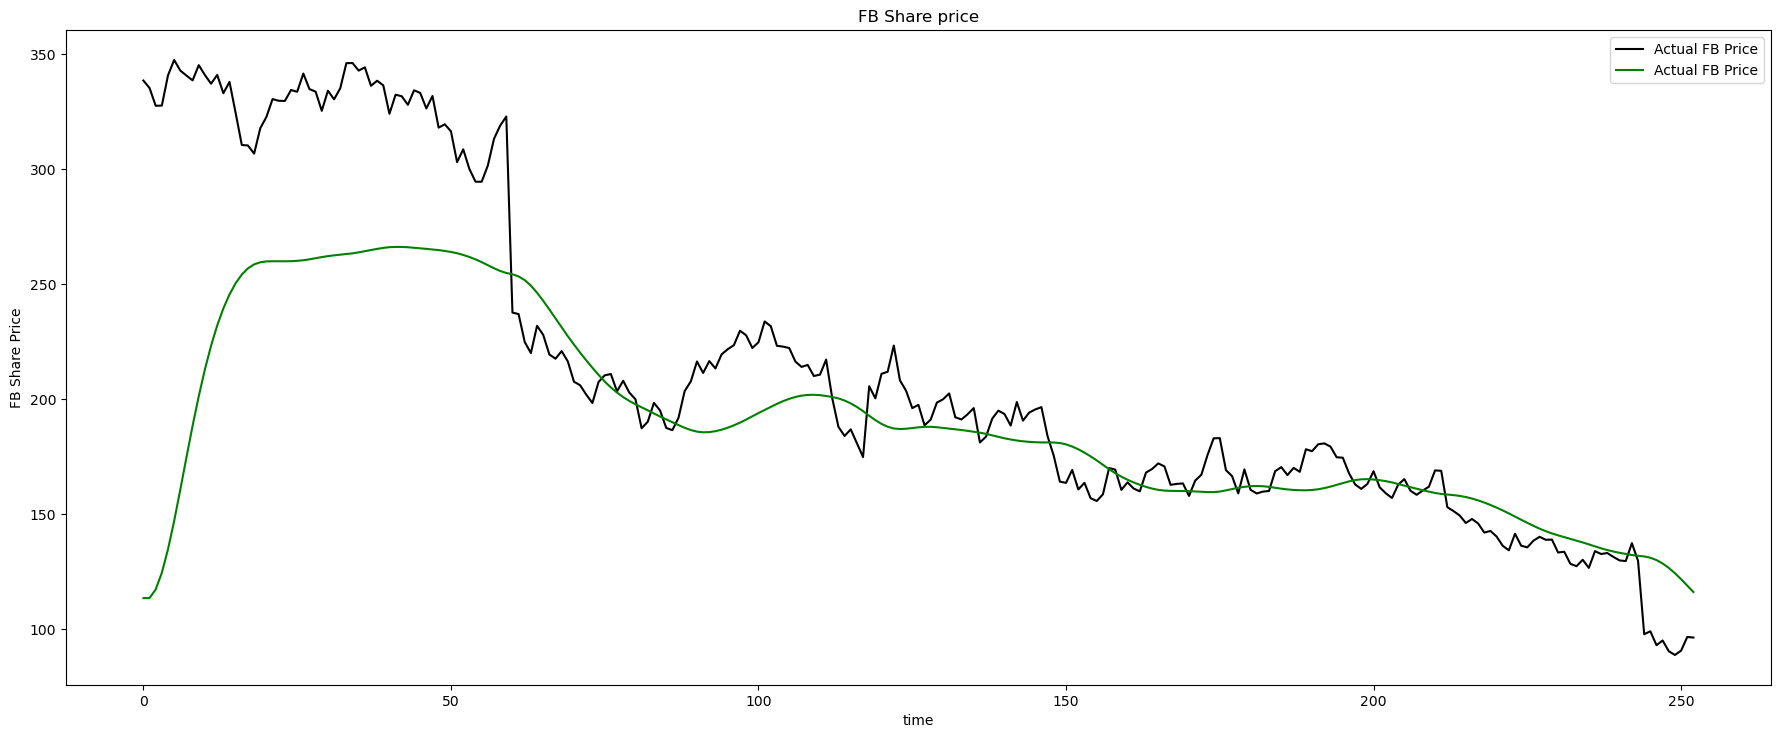

In [16]:
plt.plot(actual_prices, color = 'black', label = f"Actual {company} Price")
plt.plot(predicted_prices, color = 'green', label = f"Actual {company} Price")
plt.title(f"{company} Share price")
plt.xlabel('time')
plt.ylabel(f'{company} Share Price')
plt.legend()
plt.show()

In [17]:
#Predict Next day

real_data = [model_inputs[len(model_inputs)+ 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1],1))
prediction = model.predict(real_data)
prediction =scaler.inverse_transform(prediction)
print(f"Prediction : {prediction}")

1/1 [==============================] - 1s 687ms/step
Prediction : [[113.61856]]


The prediction for the stock price for the next day at close is $113.61.